In [1]:
import processes
import algorithm

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
rand_cond = processes.RamdomCondition()
rand_cond.add_condition((2, 8), 70)
rand_cond.add_condition((20, 30), 20)
rand_cond.add_condition((35, 40), 10)

process_list = processes.process_generate(rand_cond, 60)


In [3]:
# Run simulator algorithm
fcfs_history, fcfs_record = algorithm.FCFS(process_list)
sjf_history, sjf_record = algorithm.SJF(process_list)
rr_history, rr_record = algorithm.RR(process_list)


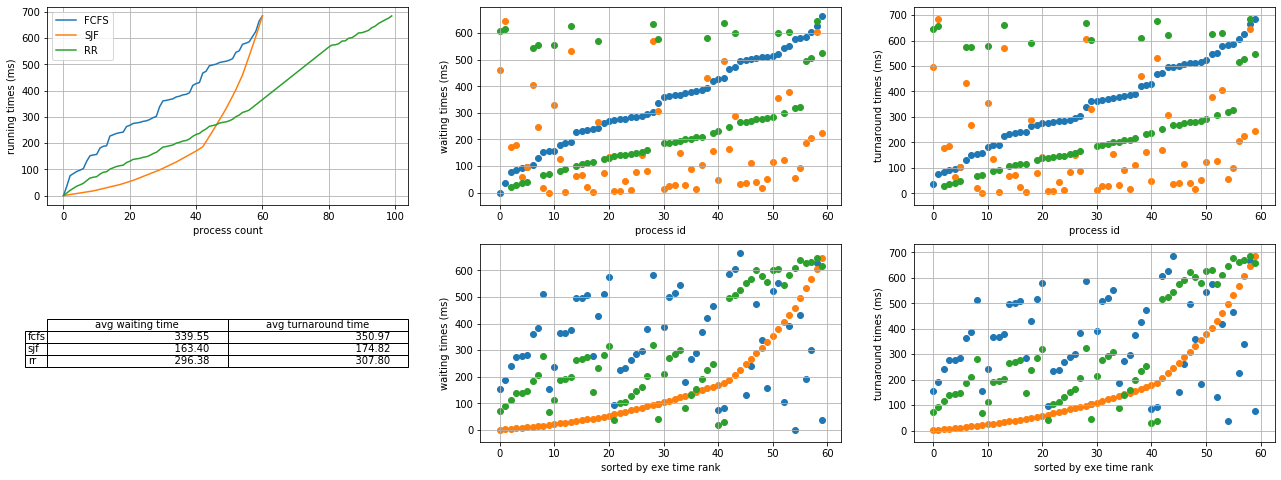

In [4]:
def get_waiting_time_list(record):
    return list(map(lambda x: x.waiting_time, record))

def get_turnaround_list(record):
    return list(map(lambda x: x.turnaround_time, record))

def sorted_exe(record): 
    return sorted(record, key=lambda x: x.exe_time)

def avg(list):
    sum = 0
    for tuple in list:
        sum += tuple
    return "{:10.2f}".format(sum / len(list))


label_set = ("FCFS", "SJF", "RR")
process_ids = list(range(len(process_list)))

fig, ax = plt.subplots(2, 3)

fig.set_size_inches(22, 8)

ax[0, 0].plot(fcfs_history)
ax[0, 0].plot(sjf_history)
ax[0, 0].plot(rr_history)
ax[0, 0].legend(label_set)
ax[0, 0].set_ylabel("running times (ms)")
ax[0, 0].set_xlabel("process count")
ax[0, 0].grid(True)

ax[0, 1].scatter(process_ids, get_waiting_time_list(fcfs_record))
ax[0, 1].scatter(process_ids, get_waiting_time_list(sjf_record))
ax[0, 1].scatter(process_ids, get_waiting_time_list(rr_record))
ax[0, 1].set_ylabel("waiting times (ms)")
ax[0, 1].set_xlabel("process id")
ax[0, 1].grid(True)

ax[0, 2].scatter(process_ids, get_turnaround_list(fcfs_record))
ax[0, 2].scatter(process_ids, get_turnaround_list(sjf_record))
ax[0, 2].scatter(process_ids, get_turnaround_list(rr_record))
ax[0, 2].set_ylabel("turnaround times (ms)")
ax[0, 2].set_xlabel("process id")
ax[0, 2].grid(True)

ax[1, 0].axis('off')
ax[1, 0].table(cellText=[[avg(get_waiting_time_list(fcfs_record)), avg(get_turnaround_list(fcfs_record))], 
                         [avg(get_waiting_time_list(sjf_record)), avg(get_turnaround_list(sjf_record))], 
                         [avg(get_waiting_time_list(rr_record)), avg(get_turnaround_list(rr_record))]], 
               rowLabels=["fcfs", "sjf", "rr"], 
               colLabels=["avg waiting time", "avg turnaround time"], 
               loc="center")

ax[1, 1].scatter(process_ids, get_waiting_time_list(sorted_exe(fcfs_record)))
ax[1, 1].scatter(process_ids, get_waiting_time_list(sorted_exe(sjf_record)))
ax[1, 1].scatter(process_ids, get_waiting_time_list(sorted_exe(rr_record)))
ax[1, 1].set_ylabel("waiting times (ms)")
ax[1, 1].set_xlabel("sorted by exe time rank")
ax[1, 1].grid(True)

ax[1, 2].scatter(process_ids, get_turnaround_list(sorted_exe(fcfs_record)))
ax[1, 2].scatter(process_ids, get_turnaround_list(sorted_exe(sjf_record)))
ax[1, 2].scatter(process_ids, get_turnaround_list(sorted_exe(rr_record)))
ax[1, 2].set_ylabel("turnaround times (ms)")
ax[1, 2].set_xlabel("sorted by exe time rank")
ax[1, 2].grid(True)

